In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Consumer_Airfare_Report__Table_5_-_Detailed_Fare_Information_For_Highest_and_Lowest_Fare_Markets_Under_750_Miles_20240129.csv'

df = pd.read_csv(file_path)

print(df.head())

       tbl  Year  quarter  mkt_fare  citymarketid_1  citymarketid_2  \
0  Table 5  2006        3     87.41           34057           31884   
1  Table 5  1997        4    224.47           30721           30198   
2  Table 5  2003        1    234.32           31995           30852   
3  Table 5  1998        3     71.25           32467           33195   
4  Table 5  1999        3    235.25           30713           30325   

                            city1                               city2  \
0                    Portland, OR                         Spokane, WA   
1  Boston, MA (Metropolitan Area)                      Pittsburgh, PA   
2       Greensboro/High Point, NC  Washington, DC (Metropolitan Area)   
3   Miami, FL (Metropolitan Area)       Tampa, FL (Metropolitan Area)   
4                       Boise, ID                          Denver, CO   

   carairlineid car  ...  carpaxshare  caravgfare  fareinc_min  \
0         19393  WN  ...         0.59       80.44           75   
1 

In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [ ]:
# Filter rows for the years 2022 and 2023 and drop them
df = df[~df['Year'].isin(['2022', '2023'])]

In [ ]:
print(df.describe())


            quarter      mkt_fare  citymarketid_1  citymarketid_2  \
count  13919.000000  13919.000000    13919.000000    13919.000000   
mean       2.406567    191.092041    31534.029312    32233.192183   
std        1.104220     88.252319     1276.025163     1401.695286   
min        1.000000     56.420000    30135.000000    30158.000000   
25%        1.000000     94.730000    30647.000000    31057.000000   
50%        2.000000    226.260000    31057.000000    31834.000000   
75%        3.000000    263.780000    32211.000000    33244.000000   
max        4.000000    426.630000    35412.000000    35412.000000   

       carairlineid        carpax   carpaxshare    caravgfare   fareinc_min  \
count  13919.000000  1.391900e+04  13919.000000  13919.000000  13919.000000   
mean   19803.757598  2.487557e+04      0.454007    191.445078    103.295855   
std      876.306624  4.588877e+04      0.265838     91.556371     37.394223   
min       -1.000000  2.600000e+02      0.100000     51.490000 

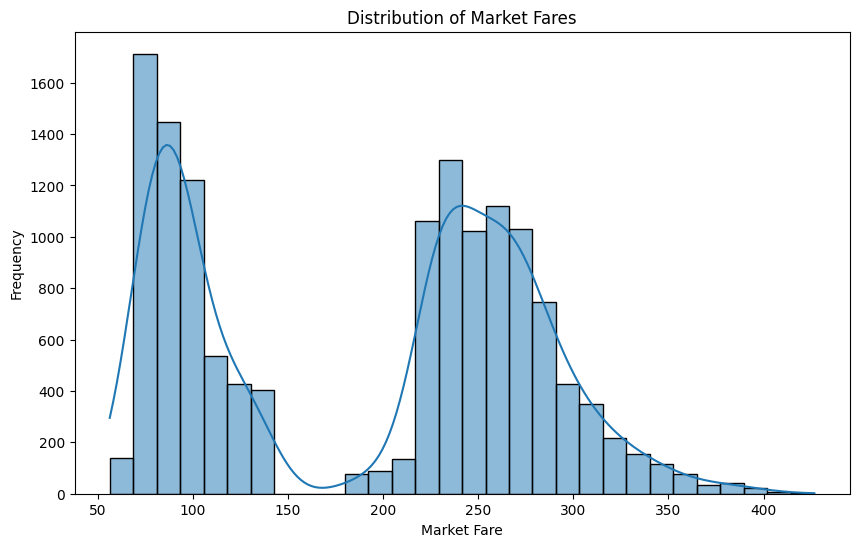

In [ ]:
# Visualize the distribution of market fares
plt.figure(figsize=(10, 6))
sns.histplot(df['mkt_fare'], bins=30, kde=True)
plt.title('Distribution of Market Fares')
plt.xlabel('Market Fare')
plt.ylabel('Frequency')
plt.show()

<ipython-input-7-3790a92a25c2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


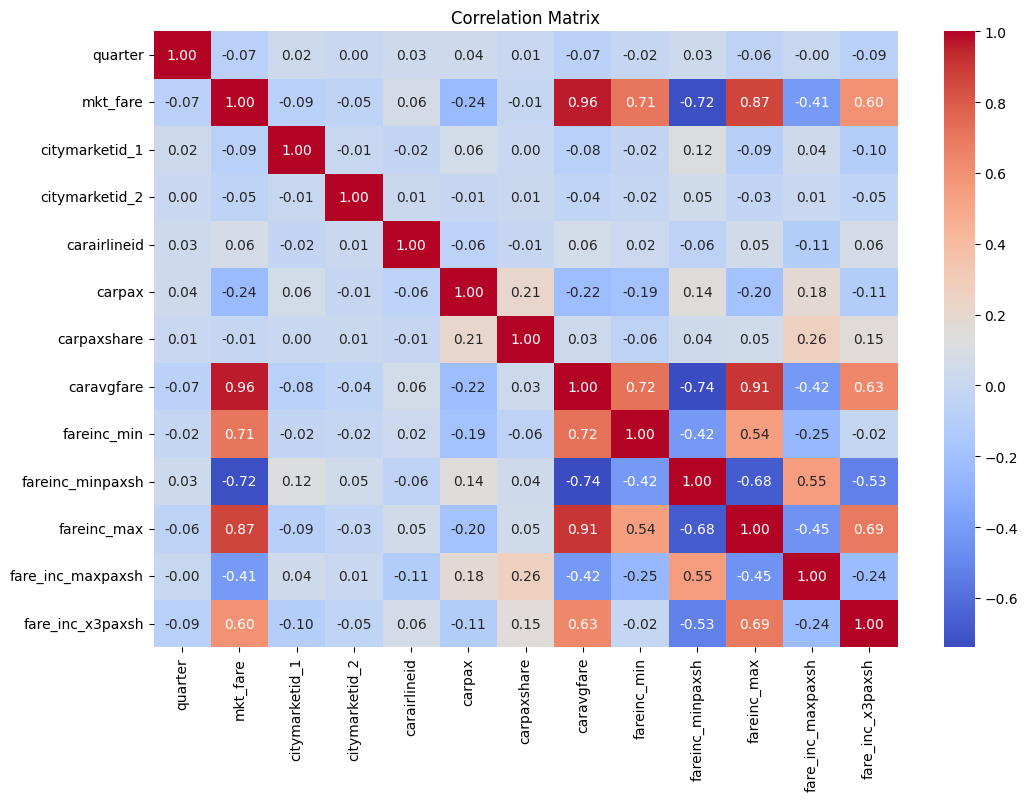

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

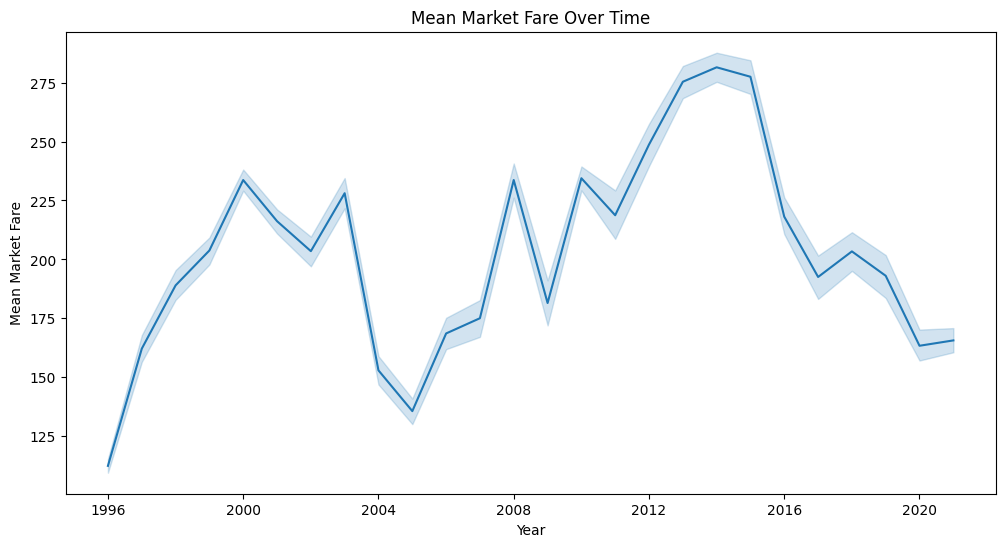

In [ ]:
# Plot the distribution of data over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='mkt_fare', data=df, estimator='mean')
plt.title('Mean Market Fare Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Market Fare')
plt.show()

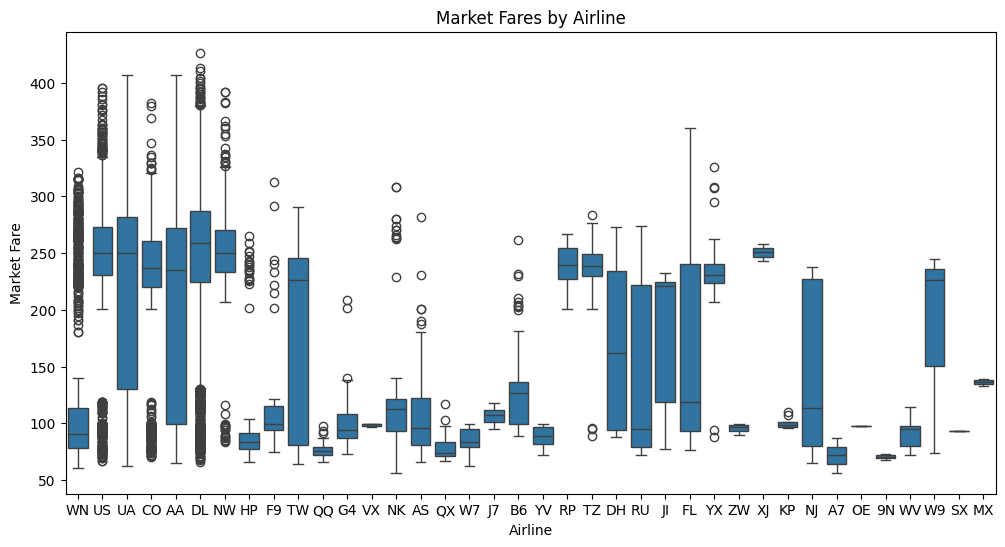

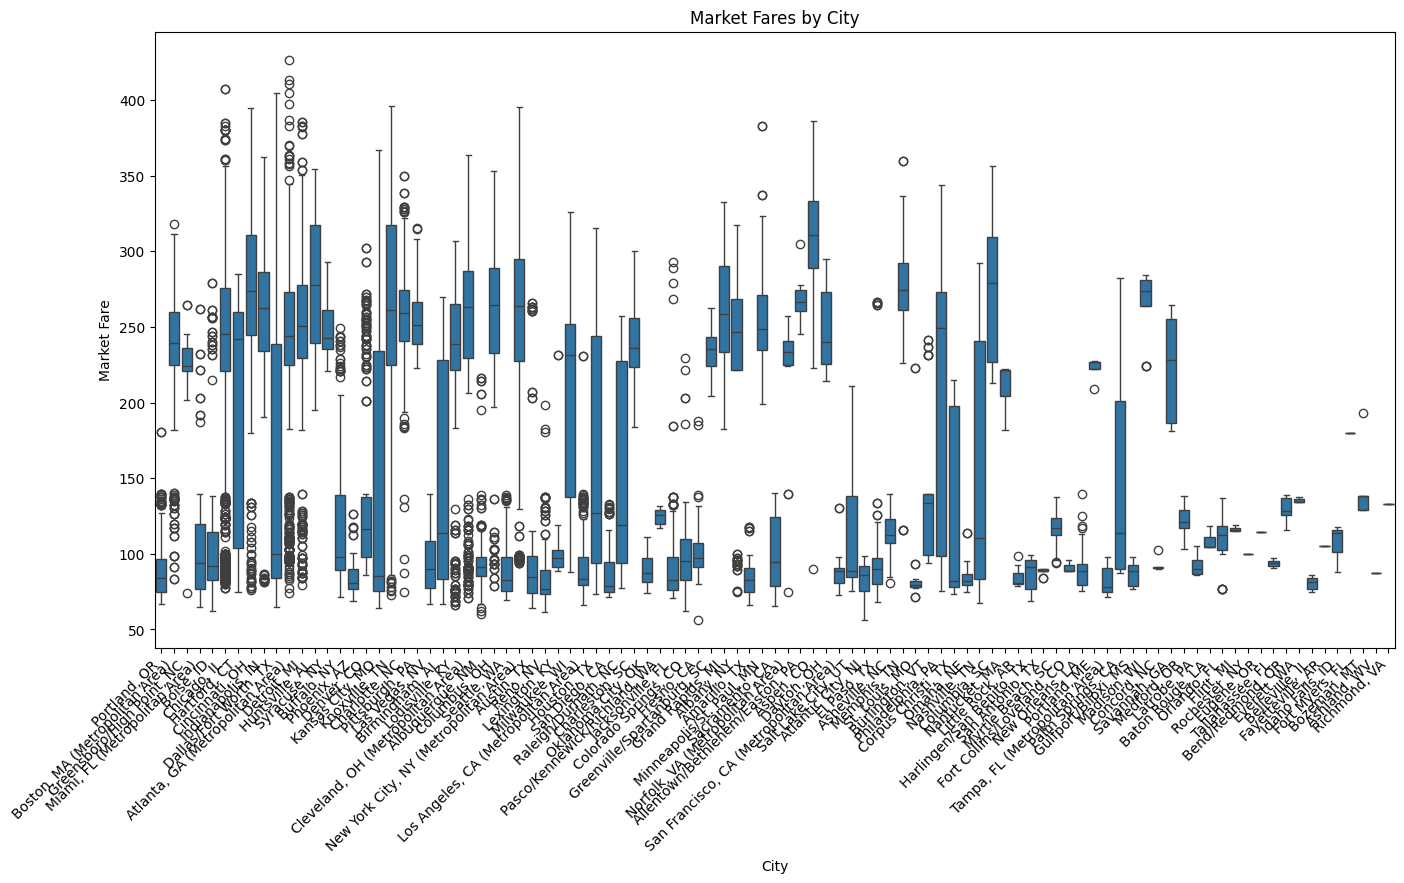

In [ ]:
# Plot the distribution of market fares for different airlines
plt.figure(figsize=(12, 6))
sns.boxplot(x='car', y='mkt_fare', data=df)
plt.title('Market Fares by Airline')
plt.xlabel('Airline')
plt.ylabel('Market Fare')
plt.show()

# Plot the distribution of market fares for different cities
plt.figure(figsize=(16, 8))
sns.boxplot(x='city1', y='mkt_fare', data=df)
plt.title('Market Fares by City')
plt.xlabel('City')
plt.ylabel('Market Fare')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Consumer_Airfare_Report__Table_5_-_Detailed_Fare_Information_For_Highest_and_Lowest_Fare_Markets_Under_750_Miles_20240129.csv'

df = pd.read_csv(file_path)

print(df.head())
import pandas as pd

# Assuming you have your data loaded into a DataFrame named df
# Replace df with your actual DataFrame variable

# Drop rows for 2022 and 2023
df = df[(df['Year'] != 2022) & (df['Year'] != 2023)]

# Calculate average market fare by airline
average_fare_by_airline = df.groupby('car')['mkt_fare'].mean().reset_index()

# Sort the average fares in descending order and get the top 20
top_20_airlines = average_fare_by_airline.sort_values(by='mkt_fare', ascending=False).head(20)

# Display the results
print("Average Market Fare by Airline:")
print(average_fare_by_airline)

print("\nTop 20 Airlines:")
print(top_20_airlines)


       tbl  Year  quarter  mkt_fare  citymarketid_1  citymarketid_2  \
0  Table 5  2006        3     87.41           34057           31884   
1  Table 5  1997        4    224.47           30721           30198   
2  Table 5  2003        1    234.32           31995           30852   
3  Table 5  1998        3     71.25           32467           33195   
4  Table 5  1999        3    235.25           30713           30325   

                            city1                               city2  \
0                    Portland, OR                         Spokane, WA   
1  Boston, MA (Metropolitan Area)                      Pittsburgh, PA   
2       Greensboro/High Point, NC  Washington, DC (Metropolitan Area)   
3   Miami, FL (Metropolitan Area)       Tampa, FL (Metropolitan Area)   
4                       Boise, ID                          Denver, CO   

   carairlineid car  ...  carpaxshare  caravgfare  fareinc_min  \
0         19393  WN  ...         0.59       80.44           75   
1 

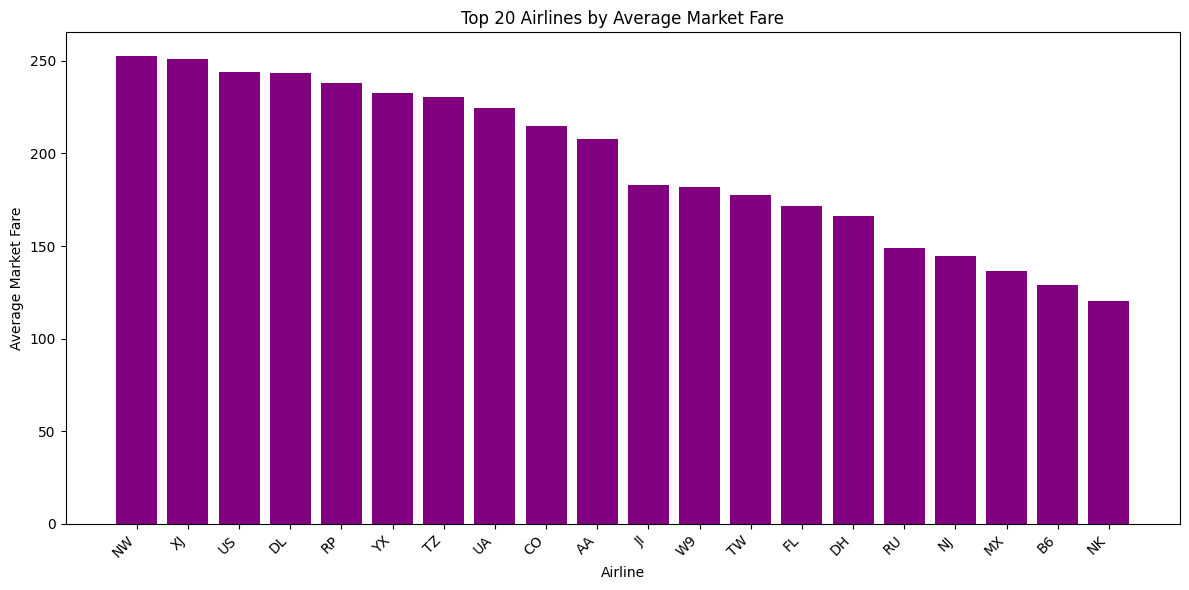

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows for 2022 and 2023
df = df[(df['Year'] != 2022) & (df['Year'] != 2023)]

# Calculate average market fare by airline
average_fare_by_airline = df.groupby('car')['mkt_fare'].mean().reset_index()

# Sort the average fares in descending order and get the top 20
top_20_airlines = average_fare_by_airline.sort_values(by='mkt_fare', ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_20_airlines['car'], top_20_airlines['mkt_fare'], color='purple')
plt.xlabel('Airline')
plt.ylabel('Average Market Fare')
plt.title('Top 20 Airlines by Average Market Fare')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import geopy.distance
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming df is your DataFrame
# Example: Calculate distance between cities
df['Distance'] = df.apply(lambda row: geopy.distance.distance(row['Geocoded_City1'][1:-1].split(', '),
                                                             row['Geocoded_City2'][1:-1].split(', ')).km, axis=1)

# Extracting month and day from 'Year' and 'quarter'
df['Month'] = df['quarter'] * 3
df['Day'] = 1

# Creating a new feature for market size
df['Market_Size'] = df['carpax'] * df['carpaxshare']

# Calculating average fare difference
df['Avg_Fare_Difference'] = df['mkt_fare'] - df['caravgfare']

# Applying one-hot encoding to 'car' (airline code)
label_encoder = LabelEncoder()
df['Airline_Code'] = label_encoder.fit_transform(df['car'])

# Creating a feature indicating route popularity
df['Route_Popularity'] = df.groupby(['city1', 'city2'])['tbl'].transform('count')

# Creating a binary feature for peak travel season
df['Peak_Season'] = df['quarter'].isin([2, 3])

# Displaying the modified DataFrame
print(df)


NameError: name 'df' is not defined